In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string

In [2]:
df = pd.read_csv("Stress.csv")

# Data preprocessing function
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'\n', ' ', text)  # Remove line breaks
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuations
    return text

# Apply preprocessing to text column
df['clean_text'] = df['text'].apply(clean_text)

# Tokenization and stemming
stemmer = SnowballStemmer('english')
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Splitting into features and labels
X = df['clean_text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

# Fit and transform on training data
X_train_count = vectorizer.fit_transform(X_train)

# Transform test data
X_test_count = vectorizer.transform(X_test)


In [4]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train_count, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_count)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       414
           1       0.73      0.82      0.77       438

    accuracy                           0.75       852
   macro avg       0.75      0.75      0.75       852
weighted avg       0.75      0.75      0.75       852

Confusion Matrix:
[[282 132]
 [ 81 357]]


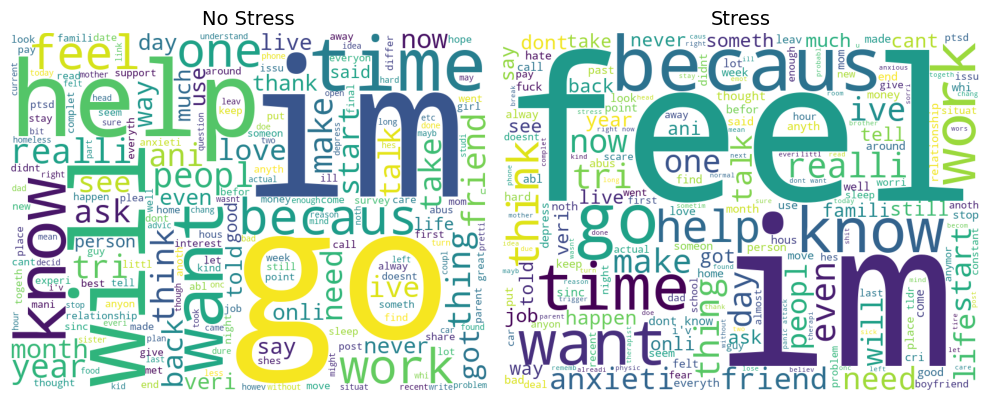

In [5]:
# Word cloud for stress and non-stress texts
plt.figure(figsize=(10, 6))

# Generate word clouds for each class
for label in [0, 1]:
    subset = df[df['label'] == label]
    text = ' '.join(subset['clean_text'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=800,
                          height=600).generate(text)
    plt.subplot(1, 2, label + 1)
    plt.imshow(wordcloud)
    plt.title('No Stress' if label == 0 else 'Stress', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Function for preprocessing user input
def preprocess_input(text):
    text = clean_text(text)  # Assuming clean_text function is defined as before
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Input from user
user_input = input("Enter a text to predict stress: ")

# Preprocess user input
processed_input = preprocess_input(user_input)

# Transform user input using CountVectorizer
input_transformed = vectorizer.transform([processed_input])

# Predict using the trained model
prediction = nb_classifier.predict(input_transformed)

# Display prediction
if prediction[0] == 1:
    print("The text indicates stress.")
else:
    print("The text does not indicate stress.")


Enter a text to predict stress: im happy
The text indicates stress.
